<a href="https://colab.research.google.com/github/Nafid-Zanis/Klasifikasi-Risiko-Penyakit-Hipertensi-dengan-Metode-Naive-Bayes/blob/main/Kode_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mengimport Library yang dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

**Membaca DataFrame**

In [ ]:
import pandas as pd

# Membaca file
df =  pd.read_csv('/content/drive/MyDrive/Klasifikasi/modified_dataset.csv')
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,1.0,1,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,1,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,1,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,1.0,1,185.0,141.0,98.0,25.60,67.0,72.0,1


In [ ]:
# Membaca data dari file CSV (ganti dengan path dataset Anda)
df = pd.read_csv('/content/drive/MyDrive/Klasifikasi/modified_dataset.csv')

# Ambil 10 data teratas
top_10 = df.head(10)

# Ambil 10 data terbawah
bottom_10 = df.tail(10)

# Gabungkan keduanya
combined_df = pd.concat([top_10, bottom_10])

# Tampilkan hasil
print(combined_df)

      male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
0        1   39              0         0.0     1.0         1    195.0  106.0   
1        0   46              0         0.0     0.0         1    250.0  121.0   
2        1   48              1        20.0     0.0         1    245.0  127.5   
3        0   61              1        30.0     0.0         1    225.0  150.0   
4        0   46              1        23.0     0.0         0    285.0  130.0   
5        0   43              0         0.0     1.0         1    228.0  180.0   
6        0   63              0         0.0     0.0         0    205.0  138.0   
7        0   45              1        20.0     1.0         1    313.0  100.0   
8        1   52              0         0.0     0.0         1    260.0  141.5   
9        1   43              1        30.0     0.0         0    225.0  162.0   
4230     0   56              1         3.0     1.0         1    268.0  170.0   
4231     1   58              0         0

**Melihat Jumlah Data dan Kolom**

In [ ]:
df.shape

(4240, 13)

**Mengecek tipe data dari tiap kolom**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


**Ringkasan dari atribut dataset**

In [ ]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.486506,0.511557,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.310613
std,0.495027,8.572942,0.500024,11.922462,0.499878,0.499925,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.462799
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,1.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,1.000000,1.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Mengecek nilai null**

In [ ]:
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
diabetes,0
totChol,50
sysBP,0
diaBP,0
BMI,19


**Mengisi missing value dengan nilai Mean dan Modus**

In [ ]:
df["cigsPerDay"]=df["cigsPerDay"].fillna(df["cigsPerDay"].mean())

df["totChol"]=df["totChol"].fillna(df["totChol"].mean())
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())
df["heartRate"]=df["heartRate"].fillna(df["heartRate"].mean())
df["glucose"]=df["glucose"].fillna(df["glucose"].mean())
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

df.isna().sum()

<ipython-input-5-2ed3ffa1e418>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)


,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
diabetes,0
totChol,0
sysBP,0
diaBP,0
BMI,0


In [ ]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

**Meliahat Matriks Korelasi**

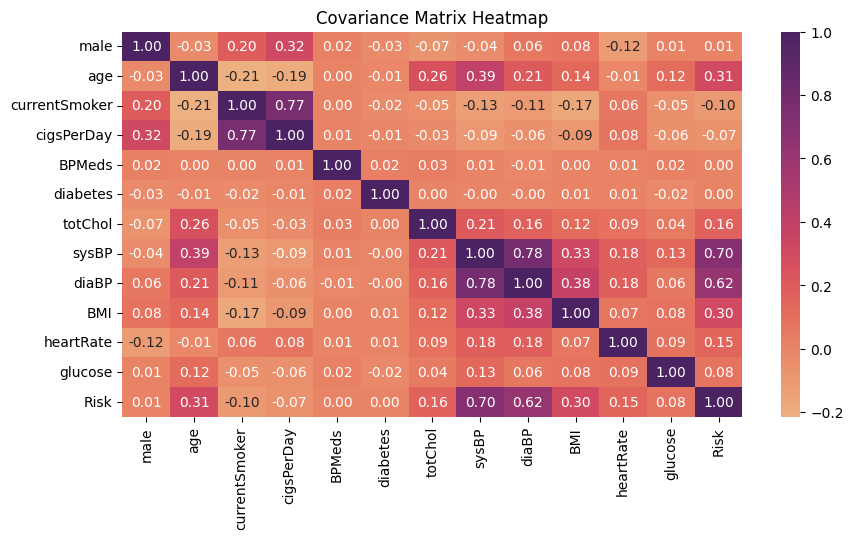

In [ ]:
# checking for redundant features with high correlation
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr()

# plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt='.2f')
plt.title('Covariance Matrix Heatmap')
plt.show()

**Exploratory Data Analyst**

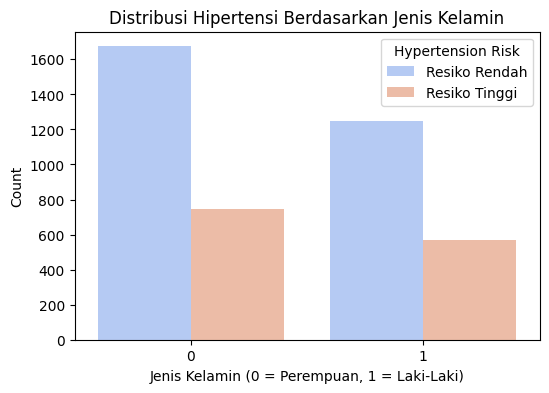

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="male", hue="Risk", data=df, palette="coolwarm")
plt.title("Distribusi Hipertensi Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin (0 = Perempuan, 1 = Laki-Laki)")
plt.ylabel("Count")
plt.legend(title="Hypertension Risk", labels=["Resiko Rendah", "Resiko Tinggi"])
plt.show()

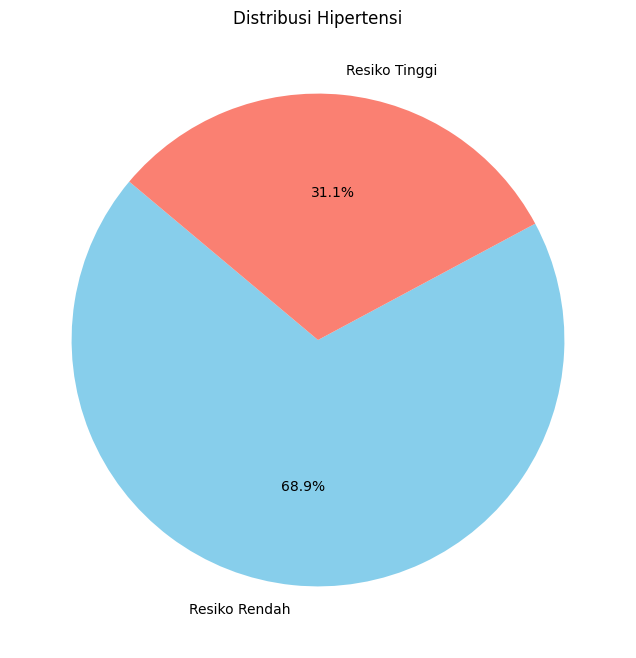

In [ ]:
target_counts = df["Risk"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=["Resiko Rendah", "Resiko Tinggi"], autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title("Distribusi Hipertensi")
plt.show()

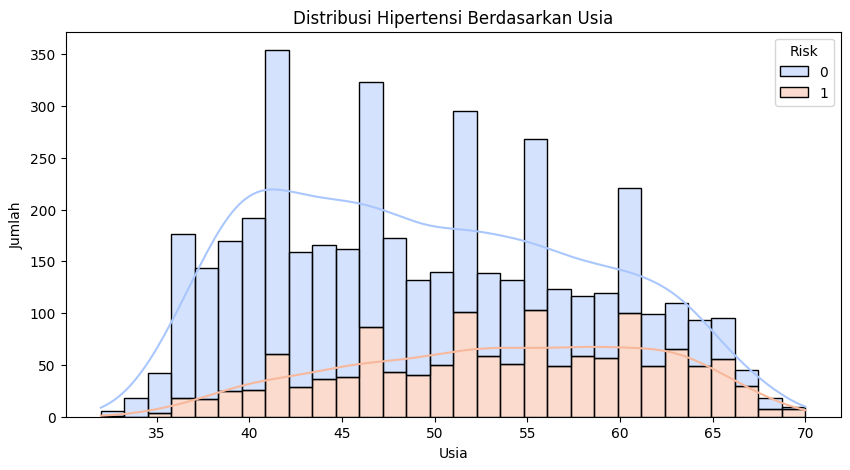

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="age", hue="Risk", multiple="stack", bins=30, palette="coolwarm", kde=True)
plt.title("Distribusi Hipertensi Berdasarkan Usia")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()

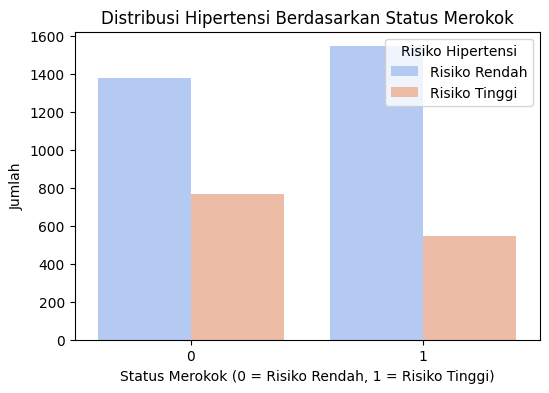

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="currentSmoker", hue="Risk", data=df, palette="coolwarm")
plt.title("Distribusi Hipertensi Berdasarkan Status Merokok")
plt.xlabel("Status Merokok (0 = Risiko Rendah, 1 = Risiko Tinggi)")
plt.ylabel("Jumlah")
plt.legend(title="Risiko Hipertensi", labels=["Risiko Rendah", "Risiko Tinggi"])
plt.show()

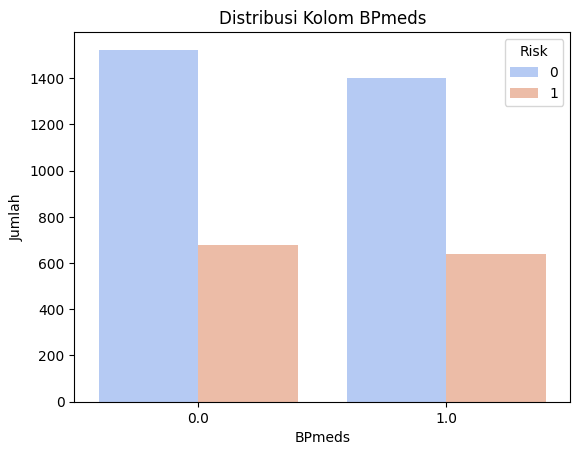

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="BPMeds", hue="Risk", data=df, palette="coolwarm")
plt.title('Distribusi Kolom BPmeds')
plt.xlabel('BPmeds')
plt.ylabel('Jumlah')
plt.show()

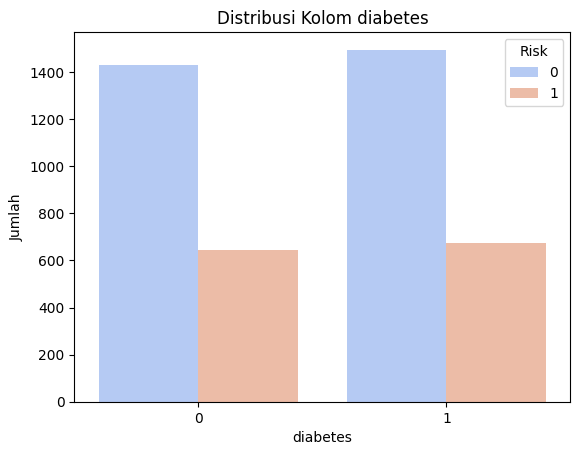

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="diabetes", hue="Risk", data=df, palette="coolwarm")
plt.title('Distribusi Kolom diabetes')
plt.xlabel('diabetes')
plt.ylabel('Jumlah')
plt.show()


**Memisahkan atibut numerik dan kategorikal**

In [ ]:
num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
cat_cols = ['male', 'BPMeds', 'diabetes', 'currentSmoker']

**Mengecek nilai outlier**

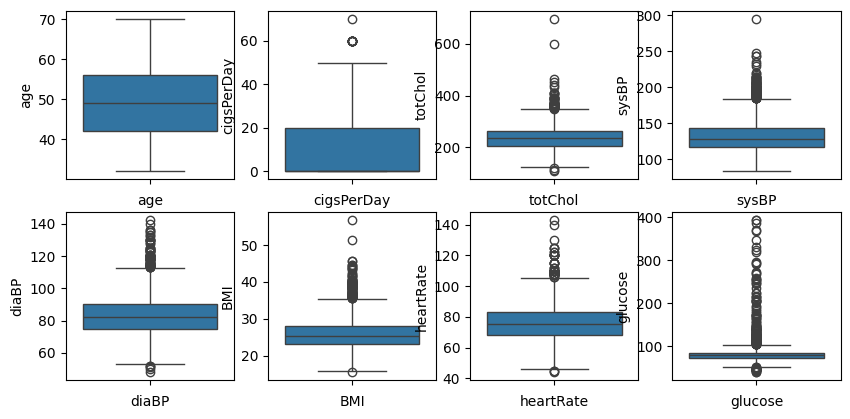

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# selecting columns to plot box plot
cols = df[num_cols]

# checking outliers
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in cols[1:]:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1

In [ ]:
# function to remove outliers using the IQR method
def remove_outliers(df, columns):

    # looping through each column
    for col in columns:
        feature = df[col]
        q1 = feature.quantile(0.25)
        q3 = feature.quantile(0.75)
        IQR = q3 - q1
        lower_bound = float(q1 - 1.5 * IQR)  # Cast to float
        upper_bound = float(q3 + 1.5 * IQR)  # Cast to float

        # replacing outliers with bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

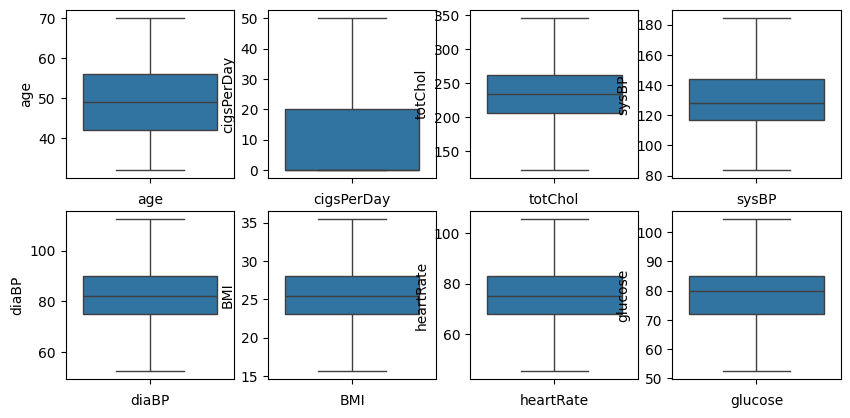

In [ ]:
# Remove outliers from specified columns
df = remove_outliers(df, cols)

# checking outliers
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in cols[1:]:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1

In [ ]:
# splitting data
X = df.drop('Risk', axis = 1)
y = df['Risk']

**Split dataset 80% dan 20%**

In [ ]:
# splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3392, 12), (3392,), (848, 12), (848,))

In [ ]:
df['Risk'].value_counts()

,count
Risk,
0,2923
1,1317


**Menyimpan Data Training dan Data Testing**

In [ ]:
# Gabungkan kembali data training (X_train dan y_train)
train_data = X_train.copy()
train_data['Risk'] = y_train

# Simpan data training ke file Excel
train_data.to_csv("/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv", index=False)

print("Data training berhasil disimpan ke file 'data_training.csv'")

Data training berhasil disimpan ke file 'data_training.csv'


In [ ]:
# Gabungkan kembali data testing (X_test dan y_test)
test_data = X_test.copy()
test_data['Risk'] = y_test

# Simpan data testing ke file CSV
test_data.to_csv("/content/drive/MyDrive/Klasifikasi Hipertensi/data_testing.csv", index=False)

print("Data testing berhasil disimpan ke file 'data_testing.csv'")


Data testing berhasil disimpan ke file 'data_testing.csv'


In [ ]:
# Mengecek jumlah label di data training
label_counts = y_train.value_counts()
print("Jumlah label di data training:")
print(label_counts)

# Atau untuk mencetak jumlah masing-masing kelas secara eksplisit
print(f"Jumlah 'risk 1': {label_counts.get('risk 1', 0)}")
print(f"Jumlah 'risk 0': {label_counts.get('risk 0', 0)}")

Jumlah label di data training:
Risk
0    2328
1    1064
Name: count, dtype: int64
Jumlah 'risk 1': 0
Jumlah 'risk 0': 0


**Melatih Model Naive Bayes**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Membuat model Naive Bayes
model = GaussianNB()

# Melatih model
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Mencetak akurasi model
print("Akurasi model: ", accuracy_score(y_test, y_pred))

# Mencetak laporan klasifikasi
print("Laporan klasifikasi: \n", classification_report(y_test, y_pred))


Akurasi model:  0.8856132075471698
Laporan klasifikasi: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       595
           1       0.81      0.81      0.81       253

    accuracy                           0.89       848
   macro avg       0.86      0.86      0.86       848
weighted avg       0.89      0.89      0.89       848



In [ ]:
y_test.value_counts()

,count
Risk,
0,595
1,253


In [ ]:
# Membuat prediksi
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.89


**Confusion Matriks**

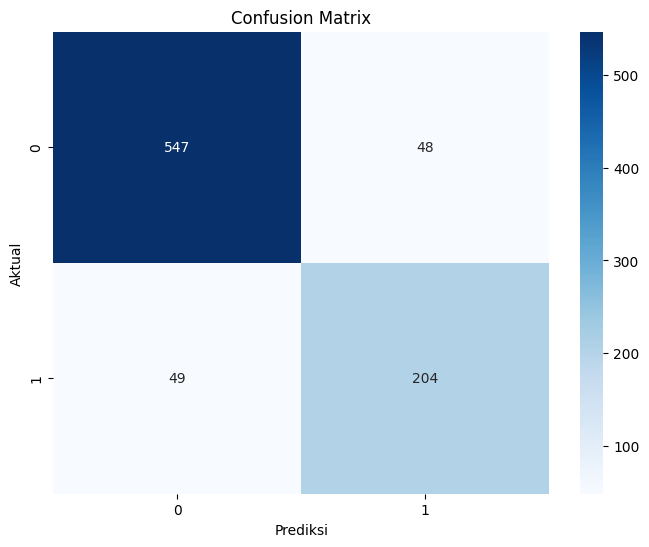

In [ ]:
from sklearn.metrics import confusion_matrix
# Membuat matriks konfusi
matriks_konfusi = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(matriks_konfusi, fmt="d", annot=True, cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
TP = matriks_konfusi[0,0]
TN = matriks_konfusi[1,1]
FP = matriks_konfusi[0,1]
FN = matriks_konfusi[1,0]

In [ ]:
# Classification Accuracy
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Classification Accuracy : {0:0.4f}'.format(classification_accuracy))

# Precision
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print('Precision : {0:0.4f}'.format(precision))

# Recall (Sensitivity or True Positive Rate)
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print('Recall (Sensitivity) : {0:0.4f}'.format(recall))

# F1-Score
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print('F1 Score : {0:0.4f}'.format(f1_score))

Classification Accuracy : 0.8856
Precision : 0.9193
Recall (Sensitivity) : 0.9178
F1 Score : 0.9186


**Menampilkan tabel perbandingan**

In [ ]:
# Membuat tabel perbandingan hasil prediksi
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

# Menampilkan tabel perbandingan
print(comparison_df)

     Actual  Predicted
0         0          0
1         0          0
2         1          0
3         1          1
4         0          0
..      ...        ...
843       0          0
844       0          0
845       1          1
846       0          0
847       0          0

[848 rows x 2 columns]


**Menampilkan Tabel prediksi yang benar**

In [ ]:
# Menampilkan hanya baris di mana prediksi benar (Actual == Predicted)
correct_predictions = comparison_df[comparison_df["Actual"] == comparison_df["Predicted"]]

# Menampilkan tabel perbandingan hanya yang benar
print("Data dengan prediksi yang benar:")
print(correct_predictions)

Data dengan prediksi yang benar:
     Actual  Predicted
0         0          0
1         0          0
3         1          1
4         0          0
5         1          1
..      ...        ...
843       0          0
844       0          0
845       1          1
846       0          0
847       0          0

[751 rows x 2 columns]


**Menampilkan tabel prediksi yang salah**

In [ ]:
# Menampilkan hanya baris di mana prediksi benar (Actual == Predicted)
correct_predictions = comparison_df[comparison_df["Actual"] != comparison_df["Predicted"]]

# Menampilkan tabel perbandingan hanya yang benar
print("Data dengan prediksi yang salah:")
print(correct_predictions)

Data dengan prediksi yang salah:
     Actual  Predicted
2         1          0
13        0          1
26        1          0
29        0          1
34        1          0
..      ...        ...
801       0          1
812       1          0
813       1          0
816       0          1
841       0          1

[97 rows x 2 columns]


**Menghitung nilai Mean dan Standar Deviasi atribut numerik**

In [ ]:
import pandas as pd

# Baca data training
file_path = '/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv'  # Ganti nama file kalau perlu
data = pd.read_csv(file_path)

# Pastikan semua data numerik bertipe numerik
data = data.apply(pd.to_numeric, errors='ignore')

# Misal kolom targetnya 'Risk'
kelas = 'Risk'

# Daftar kolom numerik yang akan dihitung
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Kelompokkan berdasarkan kelas
grouped = data.groupby(kelas)[numerical_cols]

# Hitung Mean, Standar Deviasi, dan Variansi
mean_per_class = grouped.mean()
std_per_class = grouped.std()
var_per_class = grouped.var()

# Tampilkan hasil
print("Mean tiap kelas:\n", mean_per_class)
print("\nStandar Deviasi tiap kelas:\n", std_per_class)
print("\nVariansi tiap kelas:\n", var_per_class)


Mean tiap kelas:
             age  cigsPerDay     totChol       sysBP      diaBP        BMI  \
Risk                                                                        
0     47.767182    9.674877  232.341059  121.914948  78.007517  24.959818   
1     53.552632    7.994400  246.458735  154.108553  93.355733  27.432010   

      heartRate    glucose  
Risk                        
0     74.753651  79.270249  
1     78.635225  81.268508  

Standar Deviasi tiap kelas:
            age  cigsPerDay    totChol      sysBP      diaBP       BMI  \
Risk                                                                    
0     8.103696   11.679775  40.992106  12.916439   8.353560  3.468136   
1     8.157726   11.883966  42.542100  17.548742  10.215348  3.993102   

      heartRate    glucose  
Risk                        
0     11.096831  11.083053  
1     12.119861  12.028455  

Variansi tiap kelas:
             age  cigsPerDay      totChol       sysBP       diaBP        BMI  \
Risk            

<ipython-input-33-ee937a400a15>:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


**Menghitung nilai probabilitas atribut kategorikal**

In [ ]:
import pandas as pd

# Membaca file
file_path = '/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv'
data = pd.read_csv(file_path)

# Pastikan kolom Risk dibaca dengan benar
data['Risk'] = data['Risk'].astype(int)

# Pilih atribut kategorikal
categorical_cols = ['male', 'currentSmoker', 'BPMeds', 'diabetes']

# Menghitung probabilitas untuk setiap kelas Risk
prob_per_class = {}

for col in categorical_cols:
    prob = data.groupby('Risk')[col].value_counts(normalize=True).unstack()
    prob_per_class[col] = prob

# Menampilkan hasil
for col, probs in prob_per_class.items():
    print(f"\nProbabilitas untuk atribut '{col}':")
    print(probs)



Probabilitas untuk atribut 'male':
male         0         1
Risk                    
0     0.571306  0.428694
1     0.581767  0.418233

Probabilitas untuk atribut 'currentSmoker':
currentSmoker         0         1
Risk                             
0              0.457045  0.542955
1              0.574248  0.425752

Probabilitas untuk atribut 'BPMeds':
BPMeds       0.0       1.0
Risk                      
0       0.521478  0.478522
1       0.517857  0.482143

Probabilitas untuk atribut 'diabetes':
diabetes         0         1
Risk                        
0         0.487973  0.512027
1         0.482143  0.517857


**Menghitung current SMoker**

In [ ]:
import pandas as pd

# Membaca file
file_path = '/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv'
data = pd.read_csv(file_path)

# Filter data untuk Risk=0
risk_0_data = data[data['Risk'] == 1]

# Hitung jumlah total baris dengan Risk=0
jumlah_risk_0 = len(risk_0_data)
print(f"Jumlah baris dengan Risk=0: {jumlah_risk_0}")

# Filter data untuk currentSmoker=1 dan Risk=0
smoker_risk_0_data = data[(data['currentSmoker'] == 0) & (data['Risk'] == 1)]

# Hitung jumlah baris dengan currentSmoker=1 dan Risk=0
jumlah_smoker_risk_0 = len(smoker_risk_0_data)
print(f"Jumlah baris dengan currentSmoker=0 dan Risk=1: {jumlah_smoker_risk_0}")

# Hitung probabilitas bersyarat P(currentSmoker=1 | Risk=0)
if jumlah_risk_0 > 0:
    prob_smoker_given_risk_0 = jumlah_smoker_risk_0 / jumlah_risk_0
    print(f"P(currentSmoker=0 | Risk=1): {prob_smoker_given_risk_0}")
else:
    print("Tidak ada data dengan Risk=0 untuk menghitung probabilitas.")

Jumlah baris dengan Risk=0: 1064
Jumlah baris dengan currentSmoker=0 dan Risk=1: 611
P(currentSmoker=0 | Risk=1): 0.5742481203007519


In [ ]:
import pandas as pd

# Membaca file
file_path = '/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv'
data = pd.read_csv(file_path)

# Filter data untuk Risk=0
risk_1_data = data[data['Risk'] == 1]

# Hitung jumlah total baris dengan Risk=0
jumlah_risk_1 = len(risk_1_data)
print(f"Jumlah baris dengan Risk=1: {jumlah_risk_1}")

# Filter data untuk currentSmoker=1 dan Risk=0
smoker_risk_1_data = data[(data['currentSmoker'] == 1) & (data['Risk'] == 1)]

# Hitung jumlah baris dengan currentSmoker=1 dan Risk=0
jumlah_smoker_risk_1 = len(smoker_risk_1_data)
print(f"Jumlah baris dengan currentSmoker=1 dan Risk=1: {jumlah_smoker_risk_1}")

# Hitung probabilitas bersyarat P(currentSmoker=1 | Risk=0)
if jumlah_risk_1 > 0:
    prob_smoker_given_risk_1 = jumlah_smoker_risk_1 / jumlah_risk_1
    print(f"P(currentSmoker=1 | Risk=1): {prob_smoker_given_risk_1}")
else:
    print("Tidak ada data dengan Risk=0 untuk menghitung probabilitas.")

Jumlah baris dengan Risk=1: 1064
Jumlah baris dengan currentSmoker=1 dan Risk=1: 453
P(currentSmoker=1 | Risk=1): 0.4257518796992481


**Menghitung male**

In [ ]:
import pandas as pd

# Membaca file
file_path = '/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv'
data = pd.read_csv(file_path)

# Filter data untuk Risk=0
risk_0_data = data[data['Risk'] == 1]

# Hitung jumlah total baris dengan Risk=0
jumlah_risk_0 = len(risk_0_data)
print(f"Jumlah baris dengan Risk=0: {jumlah_risk_0}")

# Filter data untuk male=1 dan Risk=0
male_risk_0_data = data[(data['male'] == 0) & (data['Risk'] == 1)]

# Hitung jumlah baris dengan male=1 dan Risk=0
jumlah_male_risk_0 = len(male_risk_0_data)
print(f"Jumlah baris dengan male=0 dan Risk=0: {jumlah_male_risk_0}")

# Hitung probabilitas bersyarat P(male=1 | Risk=0)
if jumlah_risk_0 > 0:
    prob_male_given_risk_0 = jumlah_male_risk_0 / jumlah_risk_0
    print(f"P(male=0 | Risk=0): {prob_male_given_risk_0}")
else:
    print("Tidak ada data dengan Risk=0 untuk menghitung probabilitas.")

Jumlah baris dengan Risk=0: 1064
Jumlah baris dengan male=0 dan Risk=0: 619
P(male=0 | Risk=0): 0.581766917293233


In [ ]:
import pandas as pd

# Membaca file
file_path = '/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv'
data = pd.read_csv(file_path)

# Filter data untuk Risk=1
risk_1_data = data[data['Risk'] == 1]

# Hitung jumlah total baris dengan Risk=1
jumlah_risk_1 = len(risk_1_data)
print(f"Jumlah baris dengan Risk=1: {jumlah_risk_1}")

# Filter data untuk male=1 dan Risk=1
male_risk_1_data = data[(data['male'] == 1) & (data['Risk'] == 1)]

# Hitung jumlah baris dengan male=1 dan Risk=1
jumlah_male_risk_1 = len(male_risk_1_data)
print(f"Jumlah baris dengan male=1 dan Risk=1: {jumlah_male_risk_1}")

# Hitung probabilitas bersyarat P(male=1 | Risk=1)
if jumlah_risk_1 > 0:
    prob_male_given_risk_1 = jumlah_male_risk_1 / jumlah_risk_1
    print(f"P(male=1 | Risk=1): {prob_male_given_risk_1}")
else:
    print("Tidak ada data dengan Risk=1 untuk menghitung probabilitas.")

Jumlah baris dengan Risk=1: 1064
Jumlah baris dengan male=1 dan Risk=1: 445
P(male=1 | Risk=1): 0.4182330827067669


**Menghitung BPMeds**

In [ ]:
import pandas as pd

# Membaca file
file_path = '/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv'
data = pd.read_csv(file_path)

# Filter data untuk Risk=0
risk_0_data = data[data['Risk'] == 1]

# Hitung jumlah total baris dengan Risk=0
jumlah_risk_0 = len(risk_0_data)
print(f"Jumlah baris dengan Risk=0: {jumlah_risk_0}")

# Filter data untuk male=1 dan Risk=0
male_risk_0_data = data[(data['BPMeds'] == 0) & (data['Risk'] == 1)]

# Hitung jumlah baris dengan male=1 dan Risk=0
jumlah_male_risk_0 = len(male_risk_0_data)
print(f"Jumlah baris dengan BPMeds=1 dan Risk=0: {jumlah_male_risk_0}")

# Hitung probabilitas bersyarat P(male=1 | Risk=0)
if jumlah_risk_0 > 0:
    prob_male_given_risk_0 = jumlah_male_risk_0 / jumlah_risk_0
    print(f"P(male=1 | Risk=0): {prob_male_given_risk_0}")
else:
    print("Tidak ada data dengan Risk=0 untuk menghitung probabilitas.")

Jumlah baris dengan Risk=0: 1064
Jumlah baris dengan BPMeds=1 dan Risk=0: 551
P(male=1 | Risk=0): 0.5178571428571429


In [ ]:
import pandas as pd

# Membaca file
file_path = '/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv'
data = pd.read_csv(file_path)

# Filter data untuk Risk=0
risk_0_data = data[data['Risk'] == 1]

# Hitung jumlah total baris dengan Risk=0
jumlah_risk_0 = len(risk_0_data)
print(f"Jumlah baris dengan Risk=0: {jumlah_risk_0}")

# Filter data untuk male=1 dan Risk=0
male_risk_0_data = data[(data['BPMeds'] == 1) & (data['Risk'] == 1)]

# Hitung jumlah baris dengan male=1 dan Risk=0
jumlah_male_risk_0 = len(male_risk_0_data)
print(f"Jumlah baris dengan BPMeds=1 dan Risk=1: {jumlah_male_risk_0}")

# Hitung probabilitas bersyarat P(male=1 | Risk=0)
if jumlah_risk_0 > 0:
    prob_male_given_risk_0 = jumlah_male_risk_0 / jumlah_risk_0
    print(f"P(male=1 | Risk=1): {prob_male_given_risk_0}")
else:
    print("Tidak ada data dengan Risk=0 untuk menghitung probabilitas.")

Jumlah baris dengan Risk=0: 1064
Jumlah baris dengan BPMeds=1 dan Risk=1: 513
P(male=1 | Risk=1): 0.48214285714285715


**Menghitung diabetes**

In [ ]:
import pandas as pd

# Membaca file
file_path = '/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv'
data = pd.read_csv(file_path)

# Filter data untuk Risk=0
risk_0_data = data[data['Risk'] == 1]

# Hitung jumlah total baris dengan Risk=0
jumlah_risk_0 = len(risk_0_data)
print(f"Jumlah baris dengan Risk=0: {jumlah_risk_0}")

# Filter data untuk male=1 dan Risk=0
diabetes_risk_0_data = data[(data['diabetes'] == 0) & (data['Risk'] == 1)]

# Hitung jumlah baris dengan male=1 dan Risk=0
jumlah_diabetes_risk_0 = len(diabetes_risk_0_data)
print(f"Jumlah baris dengan diabetes=1 dan Risk=0: {jumlah_diabetes_risk_0}")

# Hitung probabilitas bersyarat P(male=1 | Risk=0)
if jumlah_risk_0 > 0:
    prob_diabetes_given_risk_0 = jumlah_diabetes_risk_0 / jumlah_risk_0
    print(f"P(diabetes=1 | Risk=0): {prob_diabetes_given_risk_0}")
else:
    print("Tidak ada data dengan Risk=0 untuk menghitung probabilitas.")

Jumlah baris dengan Risk=0: 1064
Jumlah baris dengan diabetes=1 dan Risk=0: 513
P(diabetes=1 | Risk=0): 0.48214285714285715


In [ ]:
import pandas as pd

# Membaca file
file_path = '/content/drive/MyDrive/Klasifikasi Hipertensi/data_training.csv'
data = pd.read_csv(file_path)

# Filter data untuk Risk=0
risk_0_data = data[data['Risk'] == 1]

# Hitung jumlah total baris dengan Risk=0
jumlah_risk_0 = len(risk_0_data)
print(f"Jumlah baris dengan Risk=0: {jumlah_risk_0}")

# Filter data untuk male=1 dan Risk=0
diabetes_risk_0_data = data[(data['diabetes'] == 1) & (data['Risk'] == 1)]

# Hitung jumlah baris dengan male=1 dan Risk=0
jumlah_diabetes_risk_0 = len(diabetes_risk_0_data)
print(f"Jumlah baris dengan diabetes=1 dan Risk=1: {jumlah_diabetes_risk_0}")

# Hitung probabilitas bersyarat P(male=1 | Risk=0)
if jumlah_risk_0 > 0:
    prob_diabetes_given_risk_0 = jumlah_diabetes_risk_0 / jumlah_risk_0
    print(f"P(diabetes=1 | Risk=1): {prob_diabetes_given_risk_0}")
else:
    print("Tidak ada data dengan Risk=0 untuk menghitung probabilitas.")

Jumlah baris dengan Risk=0: 1064
Jumlah baris dengan diabetes=1 dan Risk=1: 551
P(diabetes=1 | Risk=1): 0.5178571428571429


**Menyimpan Model**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import pickle

def simpan_model_ke_drive(df):
    df_copy = df.copy()

    # Menyimpan model ke Google Drive
    with open('/content/drive/MyDrive/Klasifikasi Hipertensi/model.pkl', 'wb') as file:
        pickle.dump(model, file)

    print("Model telah disimpan ke Google Drive.")

# Memanggil fungsi untuk menyimpan model
simpan_model_ke_drive(df)


Dataframe tidak mengandung nilai null.
Model telah disimpan ke Google Drive.


In [ ]:
import pickle

with open('/content/drive/MyDrive/Klasifikasi Hipertensi/model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
print(type(model))

<class 'sklearn.naive_bayes.GaussianNB'>


**Rumus mencari distribusi Gaussian**

In [ ]:
from scipy.stats import norm

# Diketahui
mean = 47.685230         # Misalnya rata-rata
std_dev = 8.170287    # Misalnya standar deviasi
x = 46          # Nilai yang ingin dihitung PDF-nya

# Menghitung nilai PDF distribusi Gaussian
pdf_value = norm.pdf(x, mean, std_dev)
print("Nilai PDF Gaussian pada x =", x, "adalah", pdf_value)
